# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Fitri Dwi Lestari
- **Email:** fitridwil045@gmail.com
- **ID Dicoding:** fluvyt

## Menentukan Pertanyaan Bisnis

- Bagaimana kategori cuaca pada hari tertentu memengaruhi tingkat penggunaan sepeda?
- Apakah pola peminjaman sepeda berubah pada hari libur dibandingkan hari kerja?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv('./data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv('./data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Bike Sharing Dataset memiliki dua file data yaitu berdasarkan jam (17379 jam) dan berdasarkan hari (731 hari), keudanya memiliki kolom yang sama (instant, dteday, season, yr, month, hr, holiday, weekdat, workingdat, weathersit, temp, atemp, hum, windspeed, casual, registered, dan juga cnt). Bike Sharing Datasete tidak memiliki data per customer dataset ini menunjukkan jumlah perentalan sepeda dikelompokkan ke jenid customer, yaitu casual dan juga registered
- Dataset ini memiliki temp yang sudah dinormalisasikan dengan membaginya dengan data terbesar, begitu pula dengan atemp, hum, dan juga windspeed

### Assessing Data

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [9]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


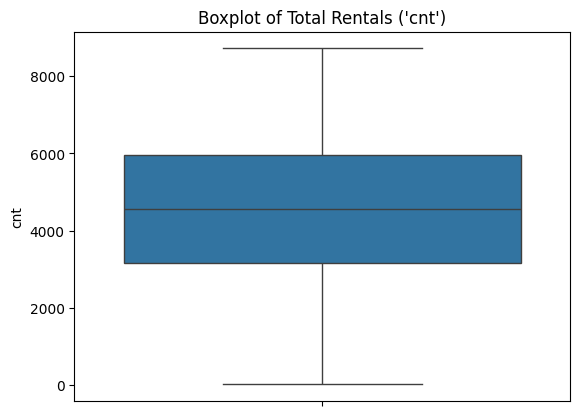

In [35]:
Q1 = day_df['cnt'].quantile(0.25)
Q3 = day_df['cnt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = day_df[(day_df['cnt'] < lower_bound) | (day_df['cnt'] > upper_bound)]

sns.boxplot(day_df['cnt'])
plt.title("Boxplot of Total Rentals ('cnt')")
plt.show()

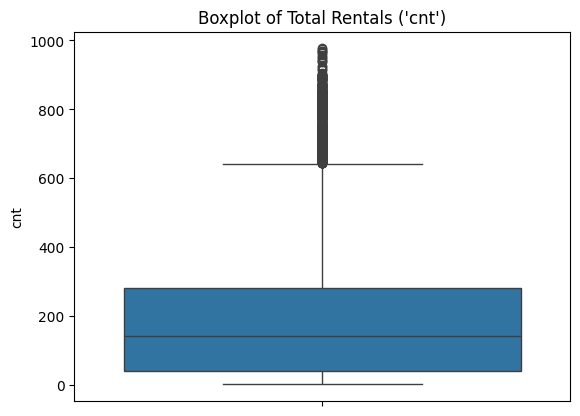

In [74]:
Q1 = hour_df['cnt'].quantile(0.25)
Q3 = hour_df['cnt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = hour_df[(hour_df['cnt'] < lower_bound) | (hour_df['cnt'] > upper_bound)]

sns.boxplot(hour_df['cnt'])
plt.title("Boxplot of Total Rentals ('cnt')")
plt.show()

**Insight:**
- Kedua file data, day_df dan juga hour_df tidak memilki missing value
- Kedua file data, day_df dan juga hour_df tidak memiliki nilai yang duplikat
- Pada day_df tidak terdapat outlier, ini menunjukkan bahwa persebaran data tidak terlalu ketimpang jauh per harinya
- Pada hour_df terdapat outlier, outlier ini diputuskan untuk tidak dihapus atau dinormalisasikan karena akan mempengaruhi day_df yang akan berubah jumlah cnt per harinya. Maka dari itu outlier ini dapat berguna untuk melihat potensi melonjaknya permintaan bike sharing pada persitiwa tertentu.

### Cleaning Data

In [10]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.isna().sum()

Jumlah duplikasi:  0


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.isna().sum()

Jumlah duplikasi:  0


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Insight:**
- Kedua data setelah di Assesing ternyata tidak memiliki missing value maupun duplikasi maka di bagian Cleaning Data hanya menunjukkan kembali hasil Assesing data
- Kedua data tidak memiliki missing value dan duplikasi

## Exploratory Data Analysis (EDA)

### Explore day.csv and hour.csv data

In [47]:
from sklearn.cluster import KMeans
X = hour_df[['hr', 'cnt']]
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
hour_df['Cluster'] = kmeans.fit_predict(X)

print("Centroid cluster:")
print(kmeans.cluster_centers_)


Centroid cluster:
[[ 14.60843091 563.30960187]
 [  9.03603507  58.89702737]
 [ 14.4224372  261.23693143]]


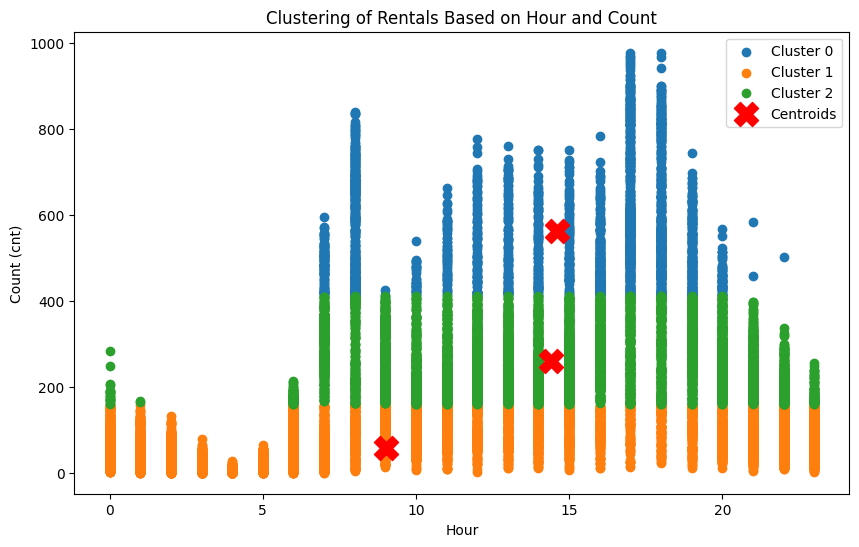

In [53]:
plt.figure(figsize=(10, 6))
for cluster in range(k):
    cluster_data = hour_df[hour_df['Cluster'] == cluster]
    plt.scatter(cluster_data['hr'], cluster_data['cnt'], label=f'Cluster {cluster}')

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.xlabel('Hour')
plt.ylabel('Count (cnt)')
plt.title('Clustering of Rentals Based on Hour and Count')
plt.legend()
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [69]:
scaler = StandardScaler()
features = day_df[['temp', 'hum']]
features_scaled = scaler.fit_transform(features)

best_k = None
best_score = -1

for k in range(2, 11): 
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(features_scaled)
    score = silhouette_score(features_scaled, labels)
    if score > best_score:
        best_k = k
        best_score = score

print(f"Jumlah cluster optimal: {best_k}")

Jumlah cluster optimal: 3


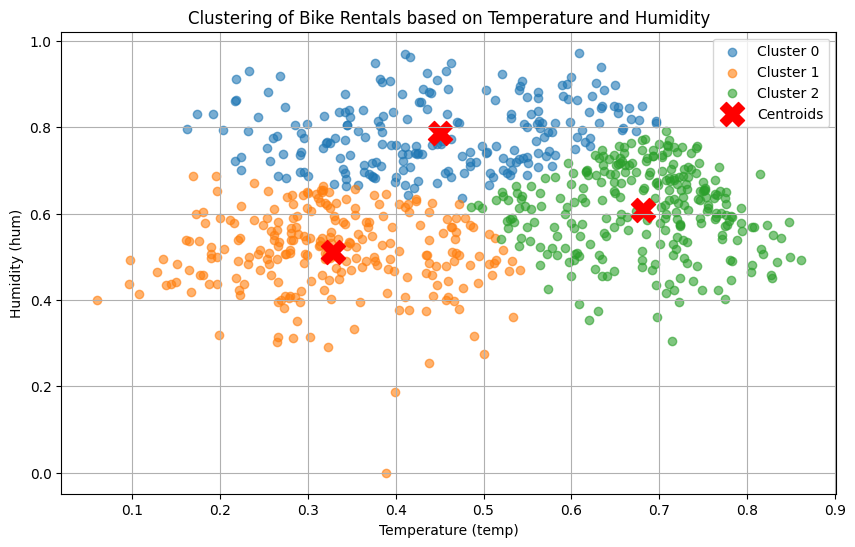

In [70]:

kmeans = KMeans(n_clusters=best_k, random_state=42)
day_df['cluster'] = kmeans.fit_predict(features_scaled)

plt.figure(figsize=(10, 6))
for cluster in np.unique(day_df['cluster']):
    cluster_data = day_df[day_df['cluster'] == cluster]
    plt.scatter(cluster_data['temp'], cluster_data['hum'], label=f'Cluster {cluster}', alpha=0.6)

centroids = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids)
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.title('Clustering of Bike Rentals based on Temperature and Humidity')
plt.xlabel('Temperature (temp)')
plt.ylabel('Humidity (hum)')
plt.legend()
plt.grid()
plt.show()


In [71]:
cluster_counts = day_df['cluster'].value_counts()
print("Jumlah data di setiap cluster:")
print(cluster_counts)

Jumlah data di setiap cluster:
cluster
2    272
1    245
0    214
Name: count, dtype: int64


**Insight:**
- Dengan menggunakan groupby, dapat melihat pengaruh weathersit dengan jumlah rental sepeda. Dapat dilihat bahwa kedua data menunjukkan bahwa banyak yang melakukan rental di cuaca kategori 1, menurut data Bike Sharing Dataset, kategori 1 artinya Clear, Few clouds, Partly cloudy, Partly cloudy
- Dengan menggunakan groupby pula, dapat dilihat nilai tengah dari perentalan sepeda pada working day dan juga hari libur
- Menggunakan hour_df, kita dapat melihat nilai tengah dari setiap jam perentalan sepeda pada working day dan juga hari libur, dapat kita lihat bahwa working day dan hari libur memiliki pola yang berbeda. Di working day perentalan paling tinggi di jam 8, 17, dan juga 18 (jam ini merupakan jam keberangkatan kerja dan kepulangan kerja, sehingga dapat dilihat bahwa banyak pekerja yang merental sepeda). Di hari libur perentalan naik secara bertahap dari pagi dan mencapai puncaknya di jam 13 dan menurun pada jam 17 (13 sd. 17 artinya ini adalah siang hingga sore hari, artinya banyak orang yang merental sepeda untuk mengisi hari liburnya sehingga perentalan sepeda bisa dilokasikan pada lokasi wisata)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana kategori cuaca pada hari tertentu memengaruhi tingkat penggunaan sepeda?

C:\Users\ASUS\AppData\Local\Temp\ipykernel_10356\2955247011.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=weather_effect_hour, palette=["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3"])


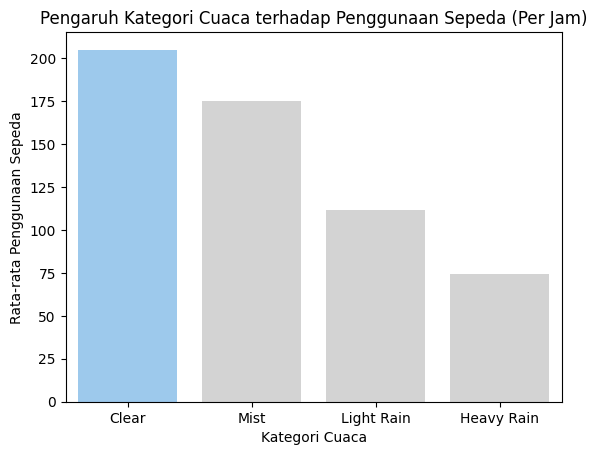

In [19]:
sns.barplot(x='weathersit', y='cnt', data=weather_effect_hour, palette=["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3"])
plt.title('Pengaruh Kategori Cuaca terhadap Penggunaan Sepeda (Per Jam)')
plt.xlabel('Kategori Cuaca')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Clear', 'Mist', 'Light Rain', 'Heavy Rain'])
plt.ylabel('Rata-rata Penggunaan Sepeda')
plt.show()

### Pertanyaan 2: Apakah pola peminjaman sepeda berubah pada hari libur dibandingkan hari kerja?

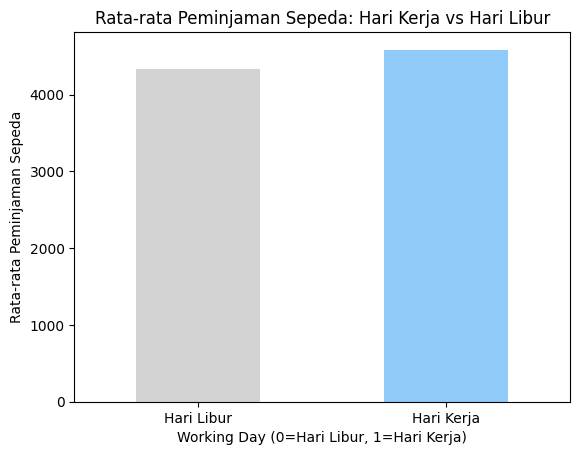

In [20]:
pola_peminjaman.plot(kind='bar', color=['#D3D3D3','#90CAF9'])
plt.title('Rata-rata Peminjaman Sepeda: Hari Kerja vs Hari Libur')
plt.xlabel('Working Day (0=Hari Libur, 1=Hari Kerja)')
plt.ylabel('Rata-rata Peminjaman Sepeda')
plt.xticks([0, 1], ['Hari Libur', 'Hari Kerja'], rotation=0)
plt.show()

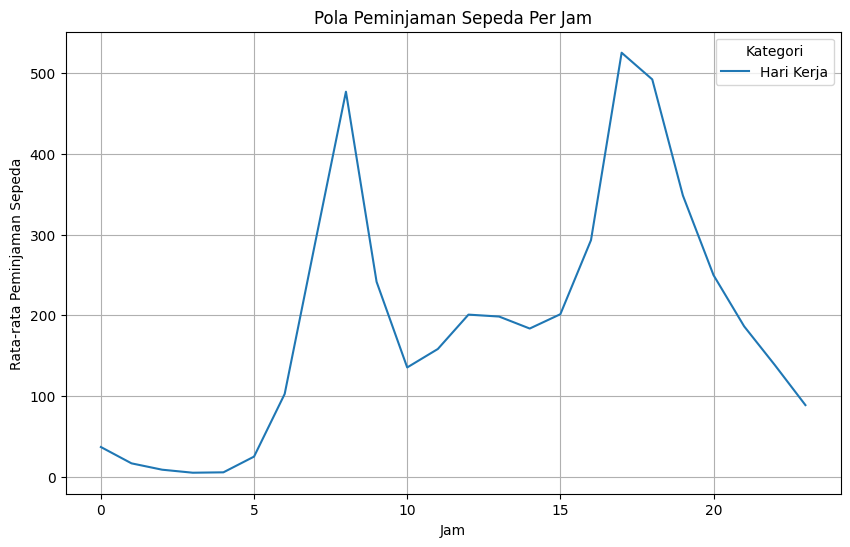

In [21]:
pola_peminjaman_jam.loc[1].plot(kind='line', figsize=(10, 6))
plt.title('Pola Peminjaman Sepeda Per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Peminjaman Sepeda')
plt.legend(['Hari Kerja'], title='Kategori')
plt.grid()
plt.show()

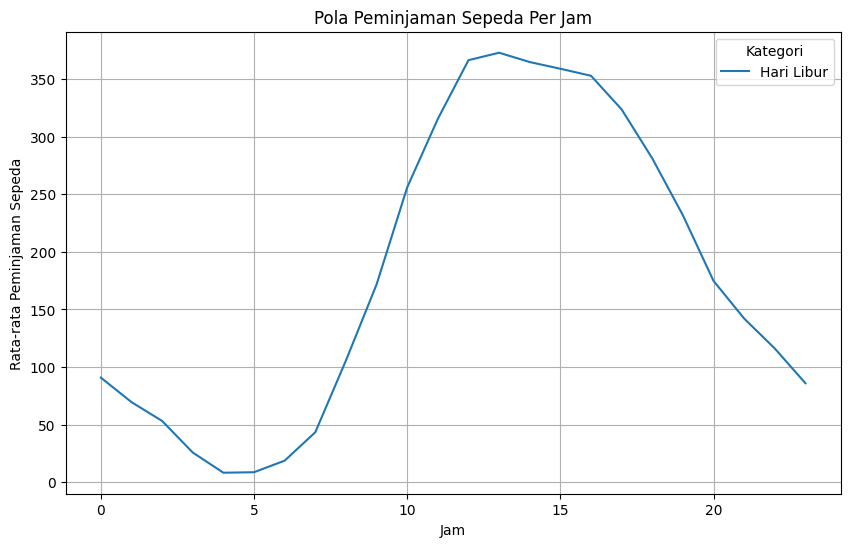

In [22]:
pola_peminjaman_jam.loc[0].plot(kind='line', figsize=(10, 6))
plt.title('Pola Peminjaman Sepeda Per Jam')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Peminjaman Sepeda')
plt.legend(['Hari Libur'], title='Kategori')
plt.grid()
plt.show()

**Insight:**
- Insight yang didapatkan dari visualisasi pertanyaan pertama adalah kita dapat melihat bahwa tidak terlalu ada perbedaan antara peminjaman di working day maupun hari libur tetapi workingday lebih tinggi daripada hari libur. Pada kategori pengaruh cuaca pula dapat dilihat bahwa kelompok cuaca 1 memiliki perentalan sepeda paling tinggi. Di pertanyaan pertama digunakan bar plot, dikarenakan ingin melihat jumlah data berdasarkan kategori, dengan menggunakan bar plot visualisasi data kategori jadi lebih mudah dilihat
- Insight yang didapatkan dari visualisasi pertanyaan kedua adalah, dapat dilihat pola perentalan sepeda berbeda di working day maupun hari libur. Pada working day ada dua pola meruncing yaitu di jam pergi kerja dan pulang kerja. Sedangkan di hari libur pola peminjaman merupakan lengkungan yang memiliki puncak di siang hari dan mulai turun di sore hari menjelang malam hari. Pertanyaan ini adalah pertanyaan yang sensitif waktu (jam), sehingga untuk melihat lebih mudah digunakan line chart untuk memudahkan melihat puncak dan lembah dari data yang ada

## Analisis Lanjutan (Opsional)

In [23]:
customer_type = [{"customer_type": "casual"}, {"customer_type": "registered"}]

In [24]:
cust = {
    "customer_type": ["casual", "registered"]
}

rfm_df = pd.DataFrame(cust)
print(rfm_df)

  customer_type
0        casual
1    registered


In [25]:
total_casual = day_df['casual'].sum()
total_registered = day_df['registered'].sum()
rfm_df['frequency'] = [total_casual, total_registered]
print(rfm_df)

  customer_type  frequency
0        casual     620017
1    registered    2672662


In [26]:
rfm_df['monetary'] = [total_casual, total_registered]
print(rfm_df)

  customer_type  frequency  monetary
0        casual     620017    620017
1    registered    2672662   2672662


In [27]:
# Pastikan kolom 'dteday' bertipe datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Hitung recency untuk casual dan registered
recency_casual = (day_df['dteday'].max() - day_df.loc[day_df['casual'] != 0, 'dteday'].max()).days
recency_registered = (day_df['dteday'].max() - day_df.loc[day_df['registered'] != 0, 'dteday'].max()).days

# Menambahkan hasil recency ke DataFrame rfm_df
rfm_df['recency'] = [recency_casual, recency_registered]

# Tampilkan hasil
print(rfm_df)


  customer_type  frequency  monetary  recency
0        casual     620017    620017        0
1    registered    2672662   2672662        0


**Insight:**
- Pada Bike Sharing Dataset tidak ada data per customer yang memiliki customer_id dan juga jumlah perentalan per satu orang tersebut. Pada data ini data dikelompokkan berdasarkan casual dan registered. Maka pada RFM Analysis ini saya meletakkan customer_type ketimbang customer_id untuk melihat manakah yang lebih berkontribusi pada bisnis rental sepeda ini (casual atau registered). 
- Karena tidak ada harga pula pada bagian monetary disamakan dengan frequency karena kita anggap saja setiap satu perentalan memberikan nilai keuntungan yang sama. Bike Sharing Dataset juga tidak memiliki data percustomer kapan terakhir kali mereka merental sepeda sehingga recency yang didapatkan dengan mengurangi tanggal terakhir dataset dengan data customer type yang memiliki nilai adalah 0

## Conclusion

- Untuk mengimpor data csv, dapat digunakan library pandas
- Bike Sharing Dataset merupakan data yang sudah bersih, ditunjukkan dengan tidak adanya nilai null maupun nilai yang terindikasi duplikat yang dinilai saat Assesing data.
- Cleaning Data tidak perlu dilakukan karena data sudah dinilai bersih dan layak untuk di explore lebih lanjut
- Sesuai dengan pertanyaan pertama, dilihat hubungan jumlah bike sharing dengan cuaca, ternyata dataset day tidak melabeli hari dengan kondisi cuaca heavy rain, tetapi dapat disimpulkan bahwa kecenderungan bike sharing terjadi di cuaca yang cerah, dan semakin tidak ada matahari semakin sedikit bike sharing yang terjadi di hari itu
- Pada pertanyaan kedua, dapat dilihat dua insight, insight pertama adalah bahwa pola peminjaman working day lebih tinggi ketimbang non-working day meskipun tidak besar, ini memperlihatkan banyak orang melakukan bike sharing untuk menjalani aktivitas di working day seperti kerja, kuliah, dan sekolah. Insight kedua yang didapatkan adalah pola bike sharing yang berbeda jauh antara working day dan noon-working day. Pada working day, polanya meruncing pada pukul 8, 17, dan 18 saja yang diasumsikan adalah waktu pergi kerja dan pulang kerja, sedangkan di non-working day, polanya menaik dan mencapai puncak pada pukul 13 dan menurun di pukul 17, non-working day tidak ada tren bike sharing di pagi hari.
- Bike Sharing Dataset dapat digunakan untuk menentukan pola konsumen sehingga dapat membantu untuk menetapkan keputusan yang dapat mengoptimalkan usaha bike sharing ini, seperti menentukkan lokasi pengadaan bike sharing sesuai hari dan cuaca.
- Akan tetapi, dataset ini tidak memberikan data per customer yang menyebabkan analisis RFM tidak terlalu berguna pada analisis ini, frequency dan monetary sama sama dilihat dari total bike sharing tiap tipe customer, sehingga kita tidak dapat melihat customer mana yang paling loyal kepada usaha.